<a href="https://colab.research.google.com/github/mckooyy/CCMLRL_EXERCISES_COM231ML-/blob/main/midtermexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

In [20]:
df = pd.read_csv('train.csv')


print(df.shape)
print(df.info())
print(df.head())


print(df.isnull().sum())

(1117957, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  111

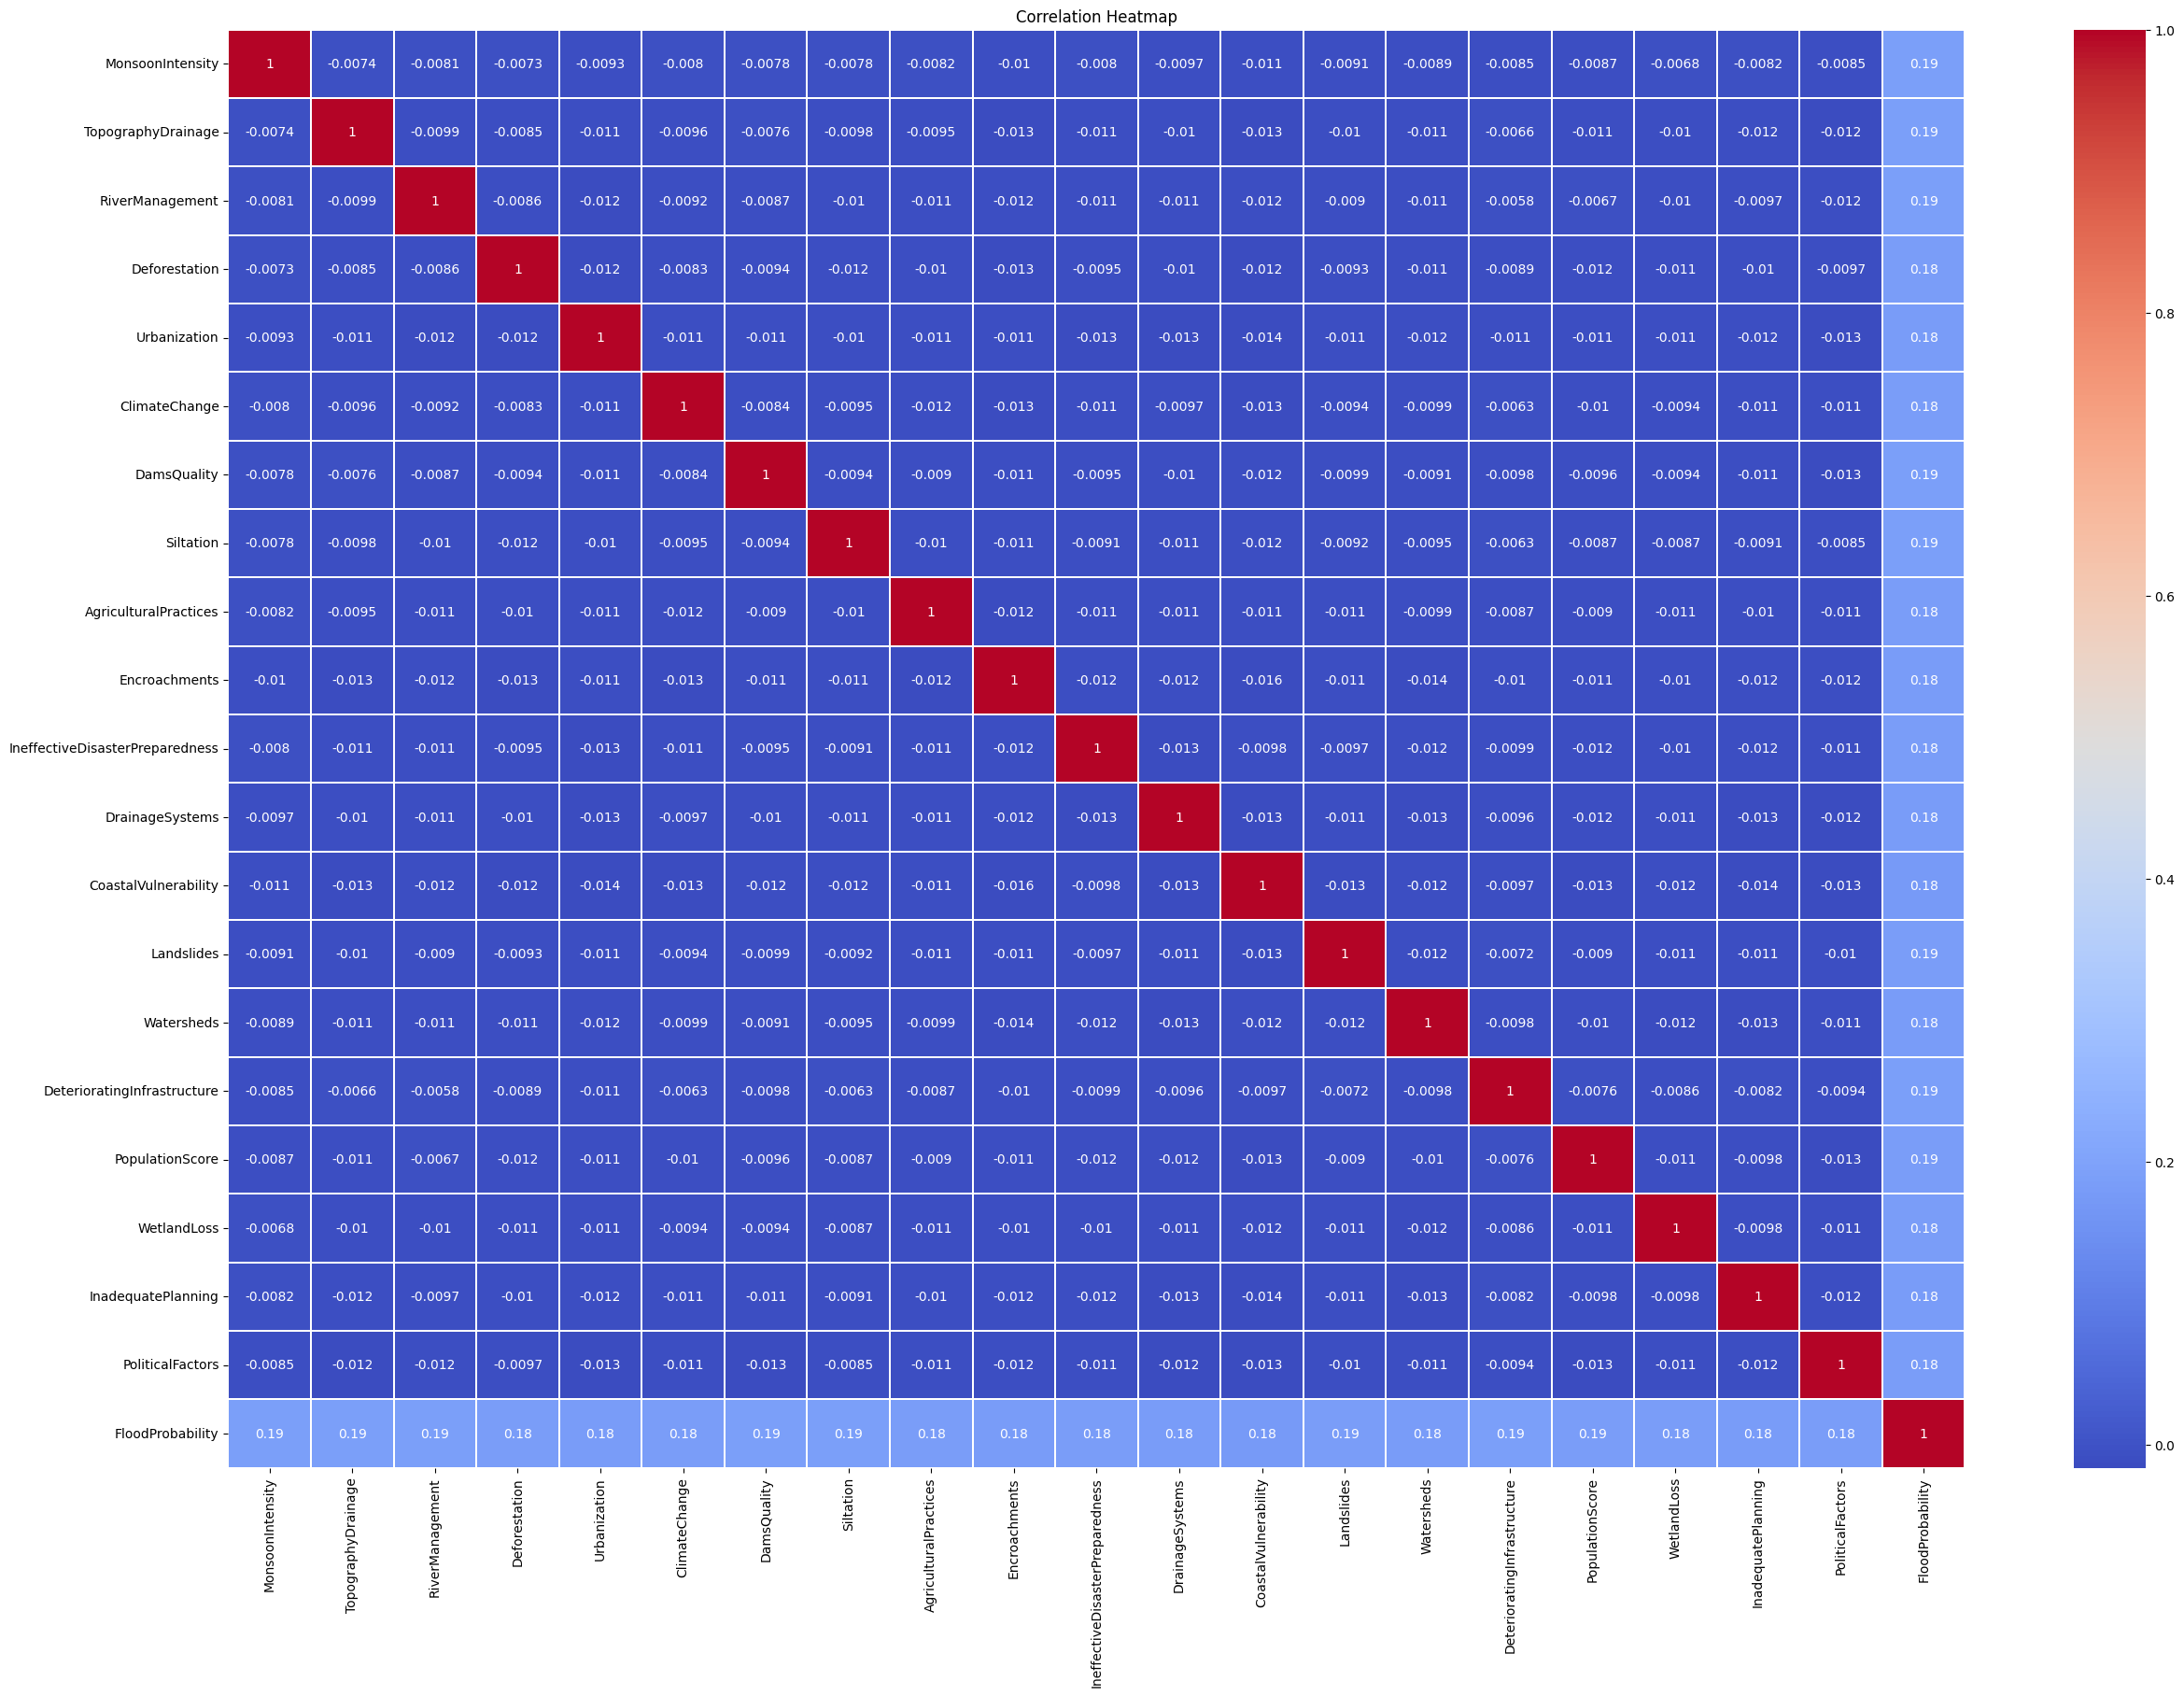

In [21]:
plt.figure(figsize=(30, 20))
corr = df.drop('id', axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()


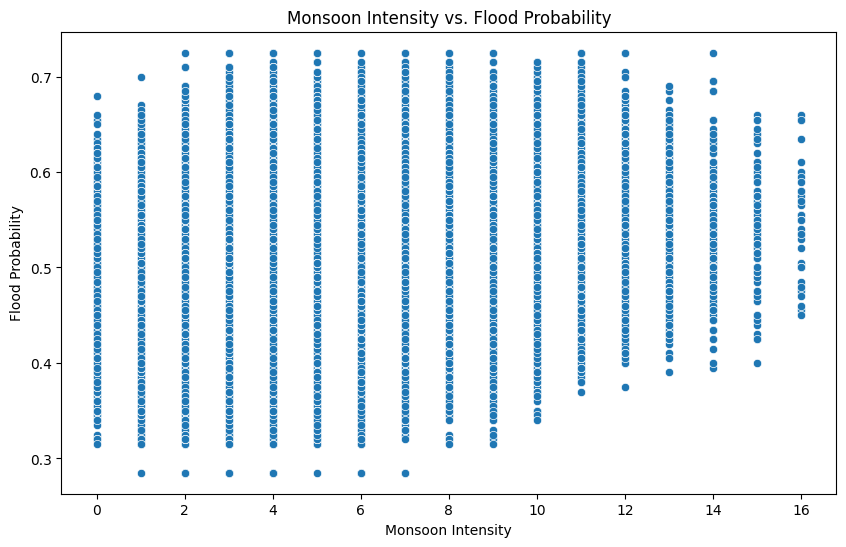

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['MonsoonIntensity'], y=df['FloodProbability'])
plt.title('Monsoon Intensity vs. Flood Probability')
plt.xlabel('Monsoon Intensity')
plt.ylabel('Flood Probability')
plt.show()


In [25]:
x = df.drop(['id', 'FloodProbability'], axis=1)
y = df['FloodProbability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [28]:
# Predict on test set
predictions = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.000403206587090558
Root Mean Squared Error: 0.020080004658628893
Mean Absolute Error: 0.01579247136376033
R^2 Score: 0.8448773362840329


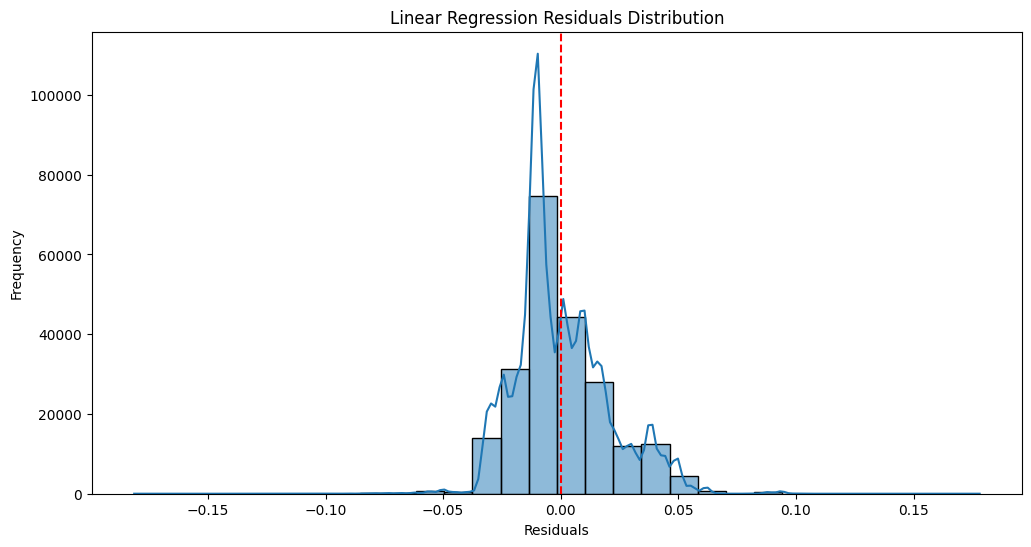

In [29]:
residuals = y_test - predictions
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Linear Regression Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [31]:
with open('flood_prediction.pkl', 'wb') as file:
    pickle.dump(model, file)


In [36]:
# Load test dataset
test_df = pd.read_csv('train.csv')
print(test_df.info())

# Check for null values
print(test_df.isnull().sum())

# Prepare input for prediction
pred_x = test_df.drop(['id', 'FloodProbability'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [37]:
submission_predictions = model.predict(pred_x)


In [46]:
# Create DataFrame for submission
submission = pd.DataFrame()
submission['id'] = test_df['id']
submission['FloodProbability'] = submission_predictions

# Save to CSV
submission.to_csv('submission.csv', index=False)

# Preview
print(submission.head())


   id  FloodProbability
0   0          0.477569
1   1          0.477285
2   2          0.505779
3   3          0.533985
4   4          0.353139
